# sklearn - mnist - follow tutorial
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [1]:
!pip install opencv-python
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y
!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/fcb.jpg
!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/messi.jpg
!wget https://raw.githubusercontent.com/gradient-ai/Simple-Face-Detection-with-OpenCV/main/haarcascade_frontalface_default.xml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 13.2 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1153 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2185 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1214 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [26.0 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [870 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1139 kB]


In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cv2

In [3]:
import pickle
filename = 'model_svm.sav'
clf = pickle.load(open(filename, 'rb'))

# code chạy trên ảnh

In [4]:
def show2image(img1, img2, title1, title2):
    f = plt.figure(figsize = (15, 15))
    f.add_subplot(1,2, 1)
    plt.title(title1)
    imgLr = cv2.cvtColor(imgLr, cv2.COLOR_BGR2RGB)
    plt.imshow(imgLr)
    f.add_subplot(1,2, 2)
    plt.title(title2)
    imgRr = cv2.cvtColor(imgRr, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRr)
    plt.show(block=True)

def showImages_1line( imgs, titles ):
    f = plt.figure(figsize = (15, 15))
    if len(imgs) != len(titles):
        print( "not same amounts")
        return

    leng = len(imgs)
        
    for i in range( len(imgs)):
        f.add_subplot(1,leng, i+1)
        plt.title( titles[i])
        img = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    
    plt.show()


def load_and_predict(path):
    # LOAD ẢNH SAU KHI CHỤP BẰNG WEBCAM
    _image = cv2.imread(path, 0)

    # TOP, BOT, LEFT, BOT ĐANG LÀ TỌA ĐỘ CỦA ĐIỂM GIỮA TẤM ẢNH
    # CÁC BIẾN NÀY CẦN TÍNH TOÀN THÀNH CÁC CỰC ĐỘ CỦA CHỮ SỐ TRONG TẤM ẢNH
    top   = _image.shape[0]//2
    bot   = _image.shape[0]//2
    left  = _image.shape[1]//2
    right = _image.shape[1]//2

    # TIỀN XỬ LÝ
    # XỬ LÝ PHẦN SÁNG VÀ TỐI TRONG BỨC ẢNH ĐỂ CẮT ẢNH
    # ẢNH SAU KHI CẮT LÀ MỘT ẢNH HỈNH VUÔNG CHỨA CHỮ SỐ
    # BIẾN DARK VÀ BRIGHT TÙY VÀO BỨC ẢNH CÓ THỂ CHỈNH SỬA CHO PHÙ HỢP, NGƯỜI CODE CHƯA BIẾT CÁCH CHỈNH BẰNG CODE NÊN ĐÀNH CHỈNH BẰNG TAY
    DARK = 50
    BRIGHT = 120
    strictedImg = _image.copy()
    # TÍNH TOÁN CÁC CỰC ĐỘ CỦA CHỮ SỐ DỰA VÀO PHẦN MÀU DEN
    for xx in range(_image.shape[0]):
        for yy in range(_image.shape[1]):
            if _image[xx][yy] <= DARK:
                if top >= xx: top = xx
                if bot <= xx: bot = xx
                if left >= yy: left = yy
                if right <= yy: right = yy

                strictedImg[xx][yy] = 0
            if _image[xx][yy] > BRIGHT:
                strictedImg[xx][yy]=255

    # DỰA VÀO CÁC 
    edge = bot - top
    if right - left > edge:
        edge = right - left
    edge = edge // 2
    midx = ( bot + top ) // 2
    midy = ( left + right ) // 2
    strictedImg = strictedImg[ midx-edge:midx+edge, midy-edge:midy+edge ]
    strictedImg = 255 - strictedImg[:,:]

    # CHỈNH ẢNH VỀ FORMAT CÓ THỂ ĐƯA VÀO MODEL
    # MODEL CÓ INPUT LÀ ẢNH 8X8, MỖI PIXEL CÓ GIÁ TRỊ THUỘC [0,16]
    strictedImg_resized = cv2.resize( strictedImg, dsize=( 8,8 ) )
    strictedImg_resized = strictedImg_resized[:,:] // 16

    # IN RA ẢNH SAU KHI QUA BƯỚC TIỀN XỬ LÝ
    # DỰ ĐOÁN VÀ ĐƯA RA KẾT QUẢ
    _result = clf.predict( strictedImg_resized.reshape( (1,64) ) )
    #print('Ảnh đã qua tiền xử lý : ')
    #plt.imshow( strictedImg ) 
    #print('Ảnh đã resize về 8x8')
    #plt.imshow( cv2.resize( strictedImg_resized, dsize = (edge * 2, edge * 2) ))
    print('predict : ',_result[0])
    
    resized_image = cv2.resize( strictedImg_resized, dsize = (edge * 2, edge * 2) )
    showImages_1line( [_image, strictedImg, resized_image], [ "gốc","qua tiền xử lý","resize 8x8"])


predict :  9


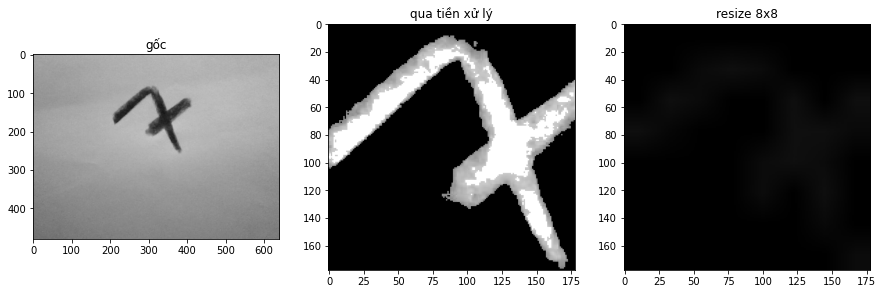

In [12]:
load_and_predict("7.jpg")

# End
